[  7.70205859e-10  -1.70680727e-05   4.20590057e-01  -1.02515505e+03]
[0, 998, 5796, 8682, 12579, 17143, 20990, 27078, 30644, 37350, 40932, 46895, 51378, 57346, 60097]
errors from cubic regression: ==========================
[1025.1550470640409, 731.64044505135337, -639.17234655598395, -1103.9069420387664, -1137.7555981896544, -1069.331077384446, 157.13143076520828, -100.69115596080519, 2340.7010767093634, -232.41385777459436, 3476.2265937892444, -183.65997348466044, -1488.5535689657845, -11297.580662850523, 9522.2105898255832]
errors with interpoliation: ==================================
[0, 49.73429951690821, -153.38105153565851, -295.01547987616095, -272.2916912894457, -1020.315301391036, 74.81479617513833, -2580.424487259166, 1144.2063862928335, -4918.53460342146, 1995.599161864855, -3235.6484778862723, 712.3535546837666, -19200.25358412662, -13930.200000000012]


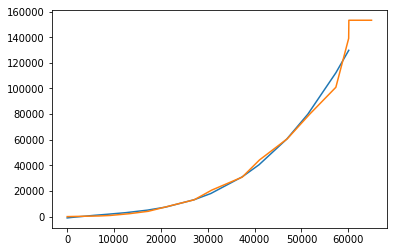

In [58]:
import numpy as np

import matplotlib.pyplot as plt

velocities = [
    0, 998, 5796, 8682, 12579, 17143, 20990, 27078, 30644, 37350, 40932, 46895, 51378, 57346, 60097,
]

stopping_distances = [
    0, 110, 350, 740, 1960, 3980, 7563, 13040, 20340, 30772, 43890, 60410, 78498, 100917, 139302,
]


npres = np.polyfit(velocities, stopping_distances, deg=3)

fitted_vals = list(map(lambda x: npres[0] * (x**3) + npres[1] * (x**2) + npres[2] * x + npres[3], velocities))
print(npres)

print(velocities)
print('errors from cubic regression: ==========================')
print(list(map(lambda x: x[0] - x[1], zip(stopping_distances, fitted_vals))))
'''
npres[0] * x^3 + npres[1] * x^2 + npres[2] * x + npres[3]
'''
#plt.plot(velocities, stopping_distances)
plt.plot(velocities, fitted_vals)
vals = list(range(0, 65000, 40))

def get_sd_interpol(val):
    smaller = -1
    larger = -1
    for i, v in enumerate(velocities):
        if v < val:
            smaller = i
        if v > val:
            larger = i
            break
    if smaller == -1:
        return 0
    smaller_val = stopping_distances[smaller]
    if larger == -1:
        larger_val = stopping_distances[14] * 1.1
    else:
        larger_val = stopping_distances[larger]
    diff = larger_val - smaller_val
    r = (val - velocities[smaller]) / (velocities[larger] - velocities[smaller]) if velocities[larger] != velocities[smaller] else 1
    #print(r)
    return smaller_val + diff * r
        
vals_res = list(map(get_sd_interpol, vals))
#print(vals_res)
print('errors with interpoliation: ==================================')
print(list(map(lambda x: stopping_distances[x[0]] - get_sd_interpol(x[1]), enumerate(velocities))))
plt.plot(vals, vals_res)
plt.show()